In [ ]:
## CHURN PROJECT ##
## Group member : Eline Tellier - Elvis Gbaguidi - Florian Ngoumou 
## - Lucie Cretin - Mélina Jehl - Léna Convers 

In [ ]:
# Load libraries 
import pandas as pd 
from sklearn import pipeline
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier 
from sklearn import datasets
# Import train_test_split function 
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation 
from sklearn import metrics 
# Import numpy metrics module 
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
# Import plot package
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/TelecomChurnDataset.csv')

In [ ]:
data["TotalCharges"] = pd.to_numeric(data.TotalCharges, errors='coerce')


In [ ]:
data['TotalCharges'].astype(float)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# We keep a version of the dataset without dummies for practical purposes for datavisualization
data_nodummies = data
# We create dummy variables for the qualitative variables
data = pd.get_dummies(data, columns=['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'Churn'])

In [ ]:
# Preparation steps
data = data.replace(r'^\s*$', np.nan, regex=True)
data = data.dropna(axis=0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   SeniorCitizen                            7032 non-null   int64  
 2   tenure                                   7032 non-null   int64  
 3   MonthlyCharges                           7032 non-null   float64
 4   TotalCharges                             7032 non-null   float64
 5   gender_Female                            7032 non-null   uint8  
 6   gender_Male                              7032 non-null   uint8  
 7   Partner_No                               7032 non-null   uint8  
 8   Partner_Yes                              7032 non-null   uint8  
 9   Dependents_No                            7032 non-null   uint8  
 10  Dependents_Yes                           7032 no

In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.495307,0.504693,0.517491,0.482509,0.701507,0.298493,...,0.209329,0.239619,0.407281,0.592719,0.219283,0.216297,0.336320,0.228100,0.734215,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.500014,0.500014,0.499729,0.499729,0.457629,0.457629,...,0.406858,0.426881,0.491363,0.491363,0.413790,0.411748,0.472483,0.419637,0.441782,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.head

<bound method NDFrame.head of       customerID  SeniorCitizen  tenure  MonthlyCharges  TotalCharges  \
0     7590-VHVEG              0       1           29.85         29.85   
1     5575-GNVDE              0      34           56.95       1889.50   
2     3668-QPYBK              0       2           53.85        108.15   
3     7795-CFOCW              0      45           42.30       1840.75   
4     9237-HQITU              0       2           70.70        151.65   
...          ...            ...     ...             ...           ...   
7038  6840-RESVB              0      24           84.80       1990.50   
7039  2234-XADUH              0      72          103.20       7362.90   
7040  4801-JZAZL              0      11           29.60        346.45   
7041  8361-LTMKD              1       4           74.40        306.60   
7042  3186-AJIEK              0      66          105.65       6844.50   

      gender_Female  gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0           

In [ ]:
data.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contrac

In [ ]:
features = data.drop(["Churn_No", "Churn_Yes", "customerID"], axis=1) #churn = target variable

X = np.array(features)

y = np.array(data["Churn_No"])

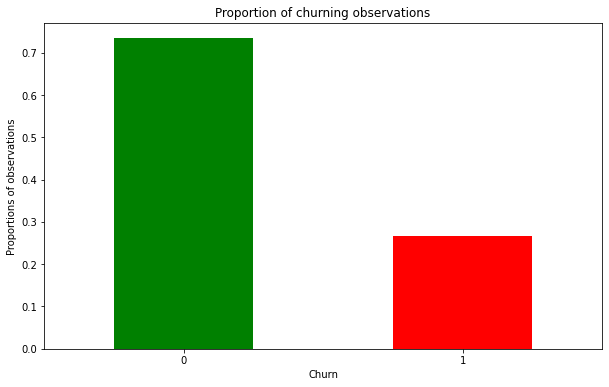

In [ ]:
### Descriptive graphs

fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_subplot(111)

# proportion of observation of each class
prop_response = data['Churn_Yes'].value_counts(normalize=True)

# create a bar plot showing the percentage of churn
prop_response.plot(kind='bar', 
                   ax=ax,
                   color=['green','red'])

# set title and labels
ax.set_title('Proportion of churning observations')
ax.set_xlabel('Churn',)
ax.set_ylabel('Proportions of observations')
ax.tick_params(rotation='auto')


Text(0.5, 1.0, 'Distribution of Tenure')

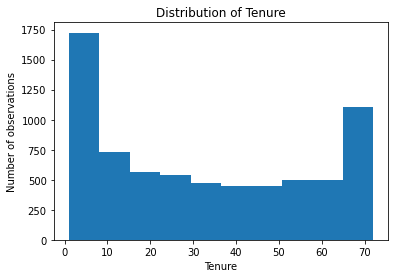

In [ ]:
# histogram the distribution of tenure.
tenure_hist = plt.hist(data = data, x = 'tenure');
# set title and labels
plt.xlabel('Tenure')
plt.ylabel('Number of observations')
plt.title("Distribution of Tenure")

Text(0.5, 1.0, 'Density plot of MontlyCharges')

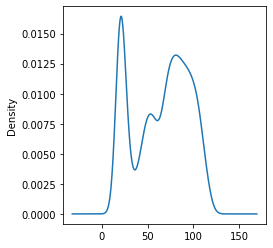

In [ ]:
data["MonthlyCharges"].plot(kind='density', subplots=True, layout=(1,2), 
                  sharex=False, figsize=(8,4));
plt.xlabel('MontlyCharges')
plt.title("Density plot of MontlyCharges")

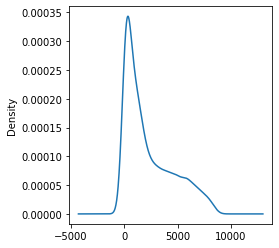

In [ ]:
data["TotalCharges"].plot(kind='density', subplots=True, layout=(1,2), 
                  sharex=False, figsize=(8,4));



Churn     No   Yes   All
gender                  
Female  2549   939  3488
Male    2625   930  3555
All     5174  1869  7043


Text(0.5, 1.0, 'Churn by Gender')

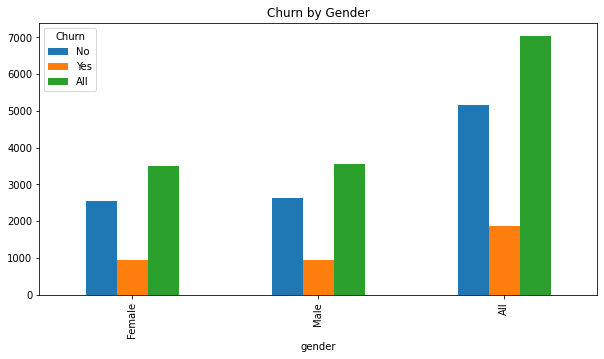

In [ ]:
print(pd.crosstab(data_nodummies.gender, data_nodummies.Churn, margins=True))
pd.crosstab(data_nodummies.gender, data_nodummies.Churn, margins=True).plot(kind="bar",figsize=(10,5))
plt.title("Churn by Gender")

Churn             No   Yes   All
Contract                        
Month-to-month  2220  1655  3875
One year        1307   166  1473
Two year        1647    48  1695
All             5174  1869  7043


Text(0.5, 1.0, 'Churn by Contract type')

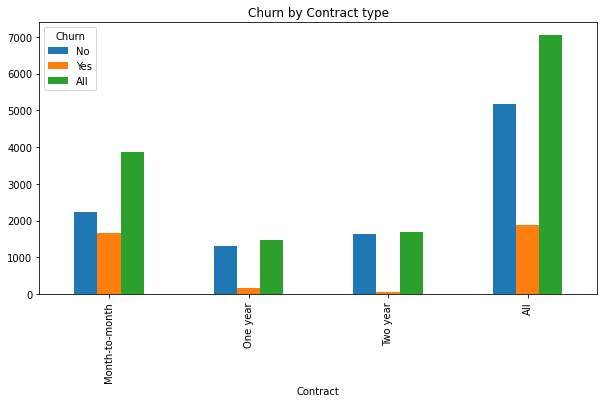

In [ ]:
print(pd.crosstab(data_nodummies.Contract, data_nodummies.Churn, margins=True))
pd.crosstab(data_nodummies.Contract, data_nodummies.Churn, margins=True).plot(kind="bar",figsize=(10,5))
plt.title("Churn by Contract type")

Churn              No   Yes   All
InternetService                  
DSL              1962   459  2421
Fiber optic      1799  1297  3096
No               1413   113  1526
All              5174  1869  7043


Text(0.5, 1.0, 'Churn by InternetService feature')

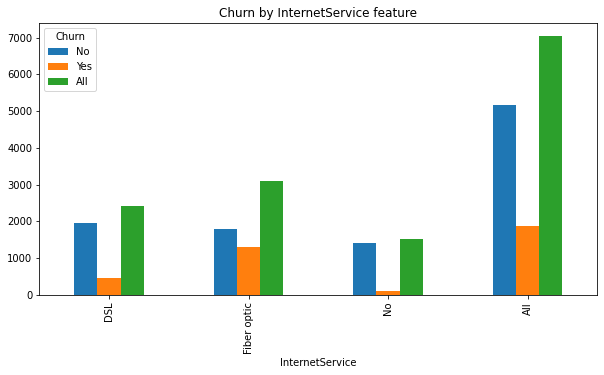

In [ ]:
print(pd.crosstab(data_nodummies.InternetService, data_nodummies.Churn, margins=True))
pd.crosstab(data_nodummies.InternetService, data_nodummies.Churn, margins=True).plot(kind="bar",figsize=(10,5))
plt.title("Churn by InternetService feature")

Churn                  No   Yes   All
StreamingMovies                      
No                   1847   938  2785
No internet service  1413   113  1526
Yes                  1914   818  2732
All                  5174  1869  7043


Text(0.5, 1.0, 'Churn by StreamingMovies feature')

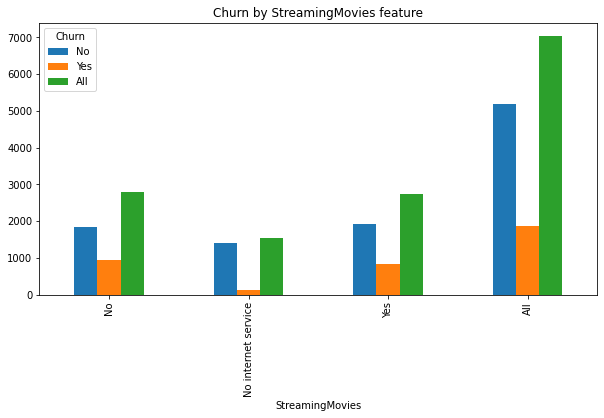

In [ ]:
print(pd.crosstab(data_nodummies.StreamingMovies, data_nodummies.Churn, margins=True))
pd.crosstab(data_nodummies.StreamingMovies, data_nodummies.Churn, margins=True).plot(kind="bar",figsize=(10,5))
plt.title("Churn by StreamingMovies feature")

{'boxes': [<matplotlib.lines.Line2D at 0x7f729c24be10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f729c251e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f729c259e50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f729c259950>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f729c2513d0>,
  <matplotlib.lines.Line2D at 0x7f729c251910>]}

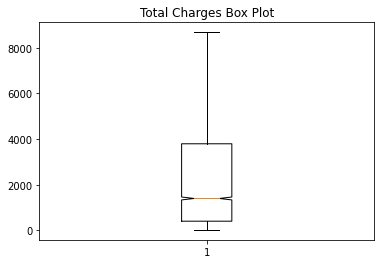

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Total Charges Box Plot')
ax1.boxplot(data["TotalCharges"],notch=True)


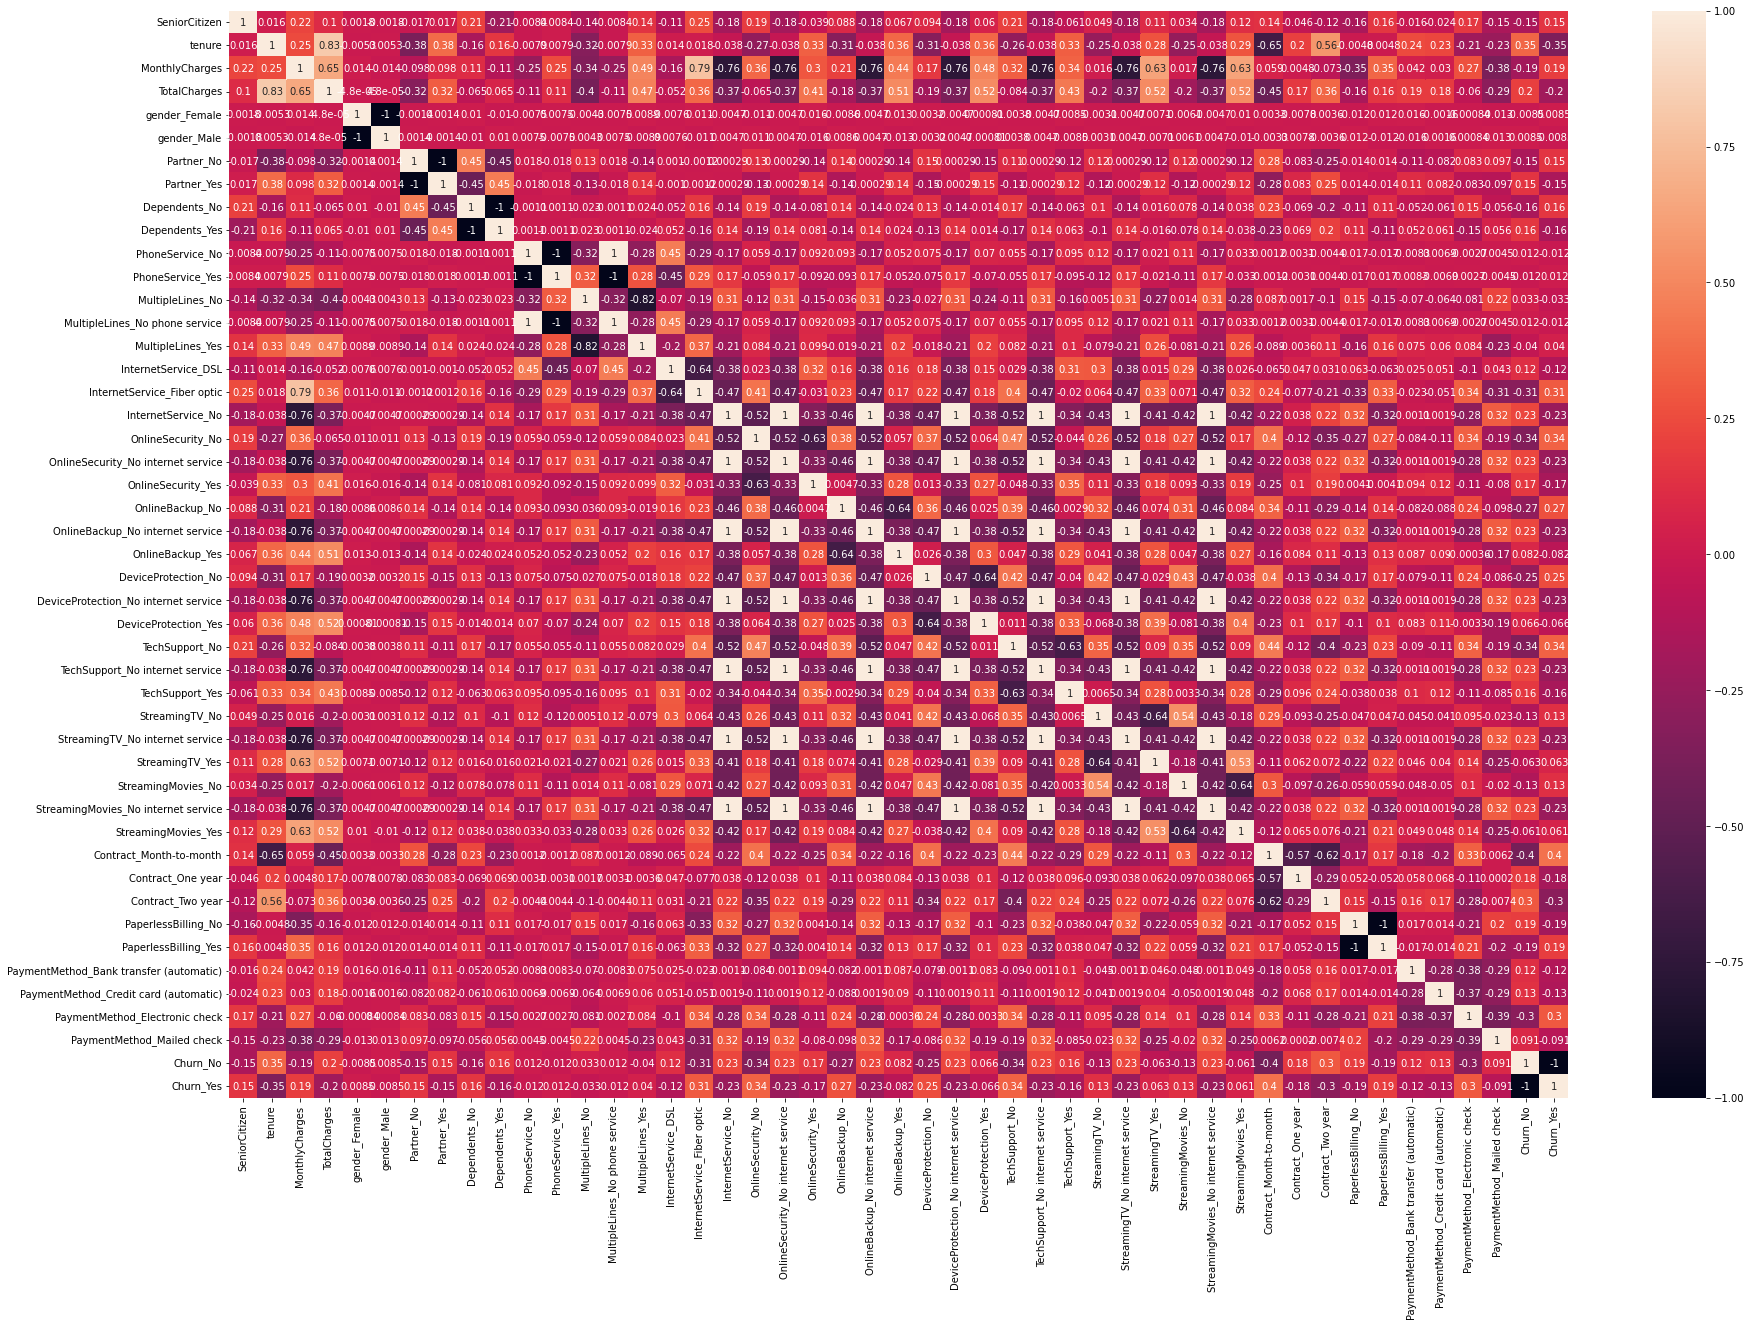

In [ ]:
# Plot correlation matrix 
plt.figure(figsize = (30,20))        # Setting up the size of the figure
sns.heatmap(data.corr(),annot = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


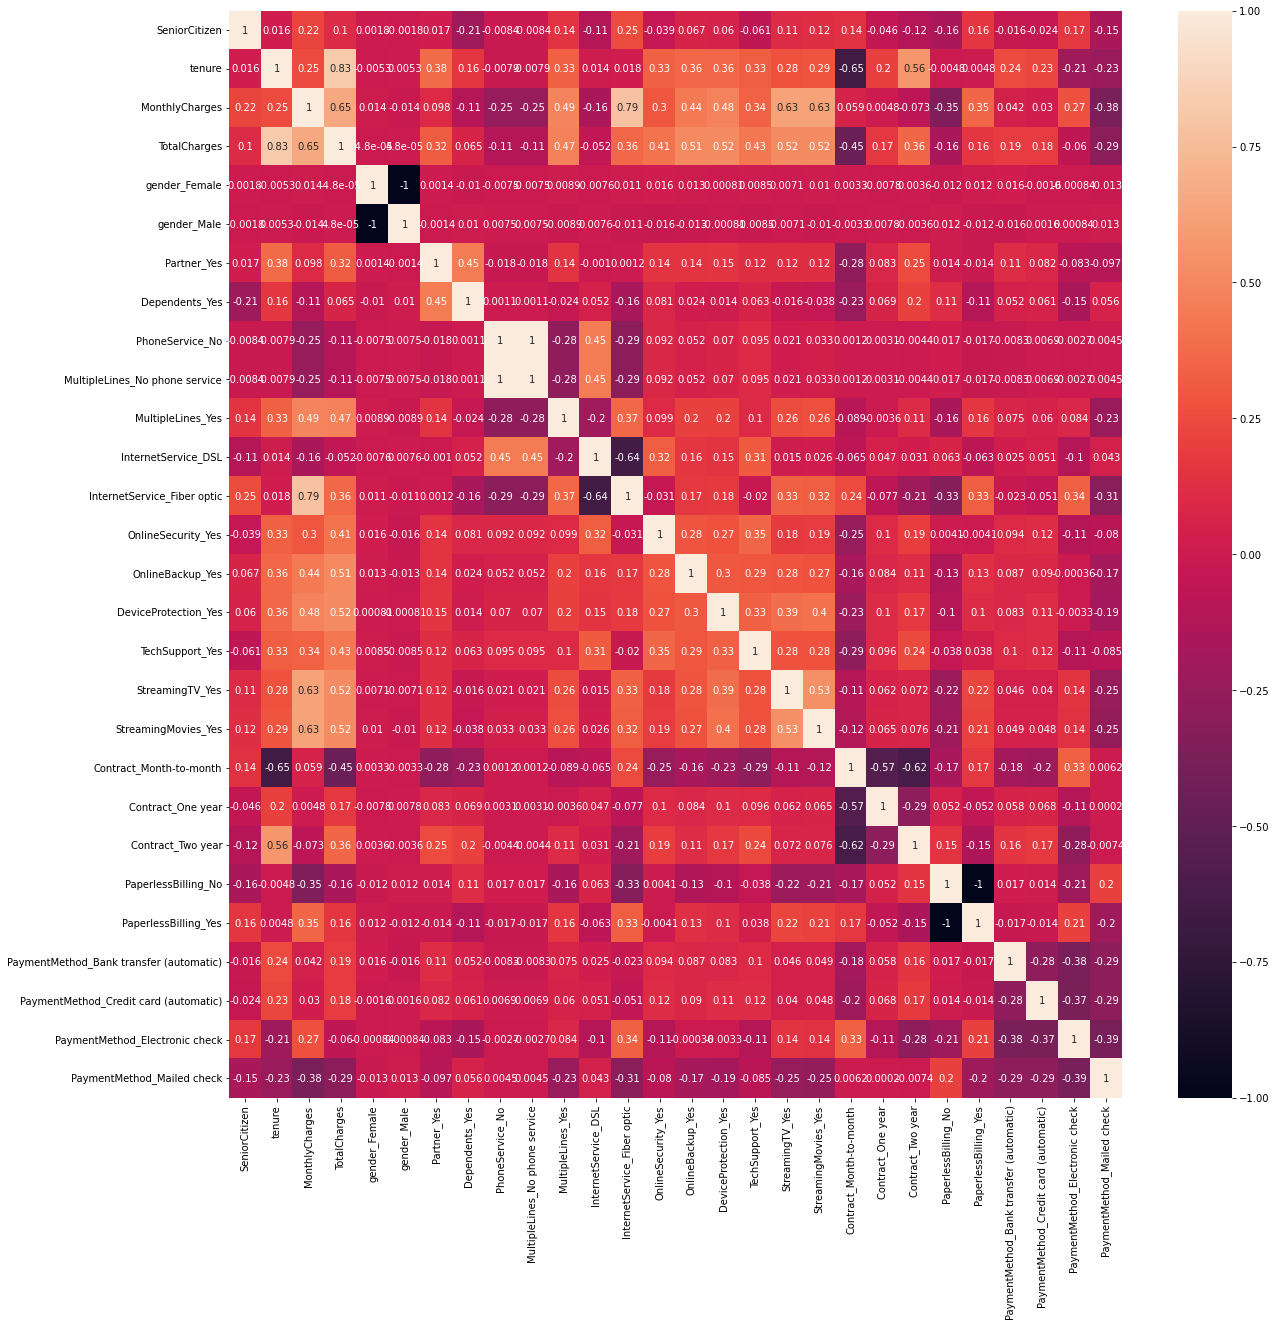

In [ ]:
# Plot correlation matrix, without higly correlated variables
data_low_corr = data.drop(["OnlineSecurity_No","OnlineBackup_No","TechSupport_No","StreamingTV_No","StreamingMovies_No","InternetService_No","OnlineSecurity_No internet service","DeviceProtection_No internet service", "StreamingTV_No internet service", "StreamingMovies_No internet service","OnlineBackup_No internet service", "TechSupport_No internet service","Churn_No","Churn_Yes","Partner_No","Dependents_No", "PhoneService_Yes", "DeviceProtection_No","MultipleLines_No"],1)
plt.figure(figsize = (20,20))        # Setting up the size of the figure
sns.heatmap(data_low_corr.corr(),annot = True)

In [ ]:
### 1st Model Logistic Regression with Bagging Classifier  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [ ]:
y_train.view()

array([0, 1, 1, ..., 0, 1, 1], dtype=uint8)

In [ ]:
X, y = make_classification(random_state=50)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
# pipeline(steps=[('standardscaler', StandardScaler()), ('logisticregression', LogisticRegression())])

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.8

In [ ]:
# Create Bagging Classifier Object
lgc = LogisticRegression()
LogBag = BaggingClassifier(base_estimator = lgc, n_estimators=100)
# Train Bagging Classifer
model1 = LogBag.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model1.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8


In [ ]:
### Confusion Matrix 
y_pred = model1.predict(X_test)
y_pred = y_pred > 0.5
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Confusion matrix:
[[ 8  3]
 [ 2 12]]
Accuracy: 80.00%


In [ ]:
### 2nd Model Decision Tree

In [ ]:
# Create Bagging classifer object
dt = DecisionTreeClassifier()
dtBag = BaggingClassifier(base_estimator= dt, n_estimators=50)
# Train Bagging Classifer
model = dtBag.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.84


In [ ]:
features = data.drop(["Churn_No", "Churn_Yes", "customerID"], axis=1) #churn = target variable

X = np.array(features)

y = np.array(data["Churn_No"])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.20)

In [ ]:
tree = DecisionTreeClassifier() 
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
tree.tree_.max_depth

23

In [ ]:
validation_prediction =  tree.predict(X_val)
training_prediction = tree.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('Accuracy training set:', accuracy_score(y_true=y_train, y_pred=training_prediction))
print('Accuracy validation set:', accuracy_score(y_true=y_val, y_pred=validation_prediction))

Accuracy training set: 0.9978666666666667
Accuracy validation set: 0.720682302771855


In [ ]:
#constraining the model

tree = DecisionTreeClassifier(min_samples_leaf=10, max_depth=6, min_samples_split=25)

In [ ]:
tree.fit(X_train, y_train)
validation_prediction = tree.predict(X_val)
training_prediction = tree.predict(X_train)

In [ ]:
print('Accuracy training set: ', accuracy_score(y_true=y_train, y_pred=training_prediction))
print('Accuracy validation set: ', accuracy_score(y_true=y_val, y_pred=validation_prediction))

Accuracy training set:  0.8106666666666666
Accuracy validation set:  0.7882018479033405


In [ ]:
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


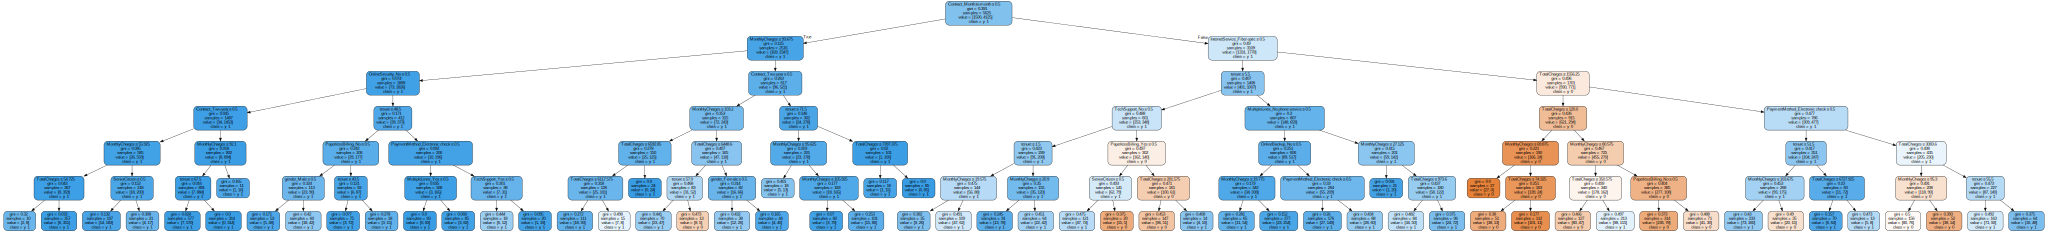

In [ ]:
feature_names = features.columns

dot_data = export_graphviz(tree, out_file=None,
                           feature_names=feature_names,
                           class_names=True,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
### 3rd Model SVC (mais 100% accuracy donc pas bon)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
data.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,1,0,0,1,1,...,0,0,0,1,0,0,1,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,0,1,1,0,1,...,1,0,1,0,0,0,0,1,1,0
2,3668-QPYBK,0,2,53.85,108.15,0,1,1,0,1,...,0,0,0,1,0,0,0,1,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,1,1,0,1,...,1,0,1,0,1,0,0,0,1,0
4,9237-HQITU,0,2,70.70,151.65,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1


In [ ]:
X = data.drop(['Churn_No', 'customerID'], axis='columns')
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1


In [ ]:
data = data.replace(r'^\s*$', np.nan, regex=True)
data = data.dropna(axis=0)

In [ ]:
y = data.Churn_No

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
print(len(X_train))
print(len(X_test))

4922
2110


In [ ]:
model = SVC(kernel='linear')

In [ ]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
predictions = model.predict(X_test)
print(predictions)

[1 1 0 ... 0 1 1]


In [ ]:
percentage = model.score(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, predictions)
print("Confusion matrix")
print(res)
print(f"Test Set: {len(X_test)}")
print(f"Accuracy: {percentage*100}%")


Confusion matrix
[[ 546    0]
 [   0 1564]]
Test Set: 2110
Accuracy: 100.0%


In [ ]:
# As we can see, the model is overfited. Thus, we are able to use BaggingClassifier in order to deal with overfitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
abc = BaggingClassifier(n_estimators=20)
model = abc.fit(X_train, y_train)

In [ ]:
# Create Bagging classifier object
svc = SVC()
svcBag = BaggingClassifier(base_estimator= svc, n_estimators=20)

# Train Bagging Classifier
model1 = svcBag.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = model1.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct ?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7260663507109004


In [ ]:
### 4th Model Random Forest 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

In [ ]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
data = pd.read_csv("/content/TelecomChurnDataset.csv")

In [ ]:
# We create dummy variables for the qualitative variables
data = pd.get_dummies(data, columns=['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'Churn'])

In [ ]:
data = data.replace(r'^\s*$', np.nan, regex=True)
data = data.dropna(axis=0)

In [ ]:
features = data.drop(["Churn_No", "Churn_Yes", "customerID"], axis=1) #churn = target variable

X = np.array(features)

y = np.array(data["Churn_No"])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.20)

In [ ]:
classifier = RandomForestClassifier()

In [ ]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
validation_prediction = classifier.predict(X_val)
training_prediction = classifier.predict(X_train)

In [ ]:
print('Accuracy training set: ', accuracy_score(y_true=y_train, y_pred=training_prediction))
print('Accuracy validation set: ', accuracy_score(y_true=y_val, y_pred=validation_prediction))

Accuracy training set:  0.9978666666666667
Accuracy validation set:  0.7910447761194029


In [ ]:
classifier = RandomForestClassifier(min_samples_leaf=10, max_depth=4, min_samples_split=50) #first try

In [ ]:
classifier.fit(X_train, y_train)
validation_prediction = classifier.predict(X_val)
training_prediction = classifier.predict(X_train)

In [ ]:
print('Accuracy training set: ', accuracy_score(y_true=y_train, y_pred=training_prediction))
print('Accuracy validation set: ', accuracy_score(y_true=y_val, y_pred=validation_prediction))

Accuracy training set:  0.7932444444444444
Accuracy validation set:  0.7910447761194029


In [ ]:
classifier = RandomForestClassifier(min_samples_leaf=10, max_depth=6, min_samples_split=50) #Change max_depth to improve the model

In [ ]:
classifier.fit(X_train,y_train)
validation_prediction = classifier.predict(X_val)
training_prediction = classifier.predict(X_train)

In [ ]:
print('Accuracy training set: ', accuracy_score(y_true=y_train, y_pred=training_prediction))
print('Accuracy validation set: ', accuracy_score(y_true=y_val, y_pred=validation_prediction))

Accuracy training set:  0.8129777777777778
Accuracy validation set:  0.7931769722814499


In [ ]:
classifier = RandomForestClassifier(min_samples_leaf=4, max_depth=14, min_samples_split=20) # Change all the parameters to improve accuracy

In [ ]:
classifier.fit(X_train,y_train)
validation_prediction = classifier.predict(X_val)
training_prediction = classifier.predict(X_train)

In [ ]:
print('Accuracy training set: ', accuracy_score(y_true=y_train, y_pred=training_prediction))
print('Accuracy validation set: ', accuracy_score(y_true=y_val, y_pred=validation_prediction))

Accuracy training set:  0.8510222222222222
Accuracy validation set:  0.8024164889836531


In [ ]:
### Stacking Classifier

In [ ]:
%pip install mlxtend --upgrade

In [ ]:
from sklearn import model_selection
from mlxtend.classifier import StackingClassifier
import warnings

In [ ]:
clf1 = RandomForestClassifier(random_state=1)
clf2 = SVC()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2], meta_classifier=lr)

In [ ]:
print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, sclf],
                      ['Random Forest',
                       'SVC',
                       'StackingClassifier']):
  scores = model_selection.cross_val_score(clf, X, y,
                                           cv=2, scoring='accuracy')
  print("Accuracy: %0.2f (+/- %0.2f) [%s]"
  % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.78 (+/- 0.00) [Random Forest]
Accuracy: 0.73 (+/- 0.00) [SVC]
Accuracy: 0.78 (+/- 0.00) [StackingClassifier]
